<center><h1> HOSPITALITY ANALYSIS </h1></center>

 ‎

<b>Problem Statement



AtliQ Grands, a prominent hotel chain operating in multiple Indian cities with various hotel types, such as AtliQ Seasons, AtliQ Exotica, AtliQ Bay, and AtliQ Palace, has been facing declining revenue and market share. To address this challenge and improve their financial performance, AtliQ Grands aims to leverage data analytics to make data-informed decisions. The project's goal is to analyze booking data collected from various sources, including the company's website and third-party booking platforms, in order to identify opportunities for revenue enhancement and market competitiveness.

 ‎

Lets start with importing of necessary libraries

In [2]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt

 ‎

<h3>Data Import and Data Exploration</h3>

Dataset:
We have 5 csv files
dim_date.csv
dim_hotels.csv
dim_rooms.csv
fact_aggregated_bookings.csv
fact_bookings.csv

 ‎

<b>Read bookings data in a dataframe<b>

In [3]:
df_bookings=pd.read_csv('datasets/fact_bookings.csv')                 

 ‎

<b>Explore bookings data<b>

In [4]:
# Printing first 5 rows from the fact_bookings.csv file

df_bookings.head() 

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [5]:
# Checking the size of the table (rows & columns)

df_bookings.shape

(134590, 12)

In [6]:
# Types of available rooms

df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [7]:
# Booking platforms used to book a room

df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [8]:
# Number of Bookings by each Booking Platform

df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

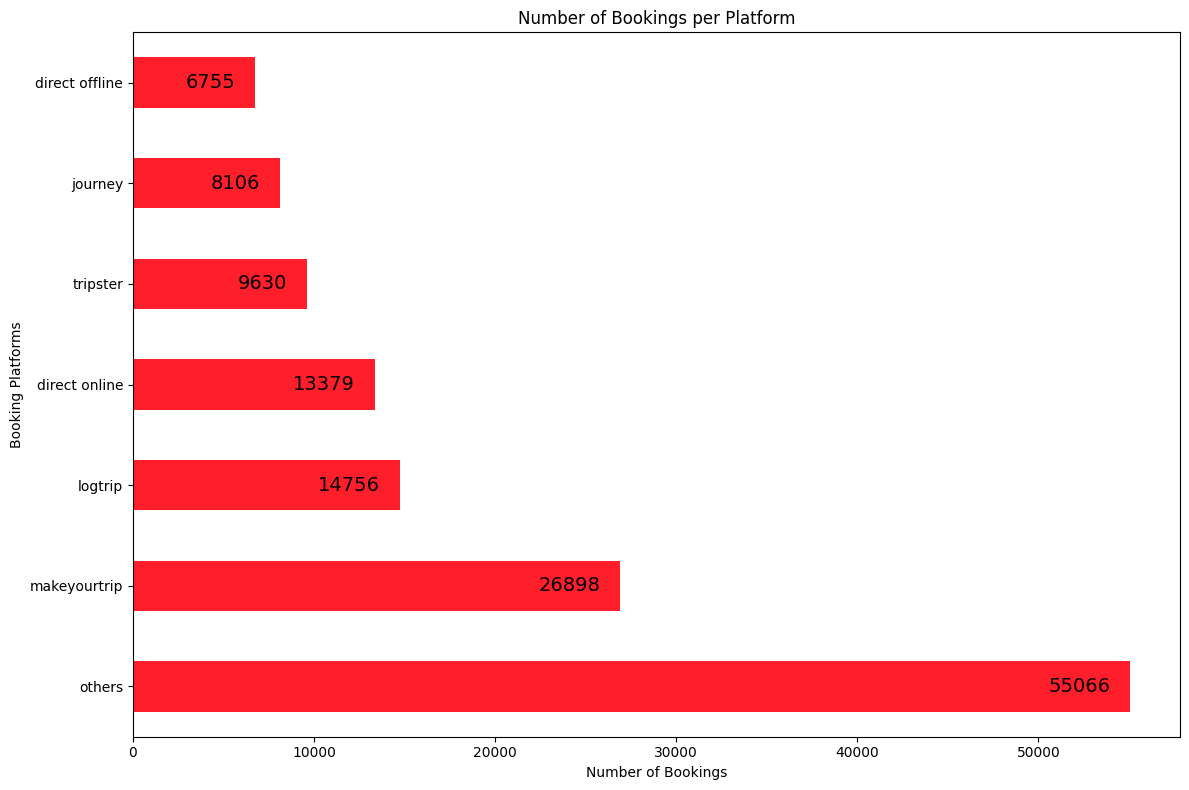

In [9]:
# Plot Bar Chart for the booking platform data

graph = df_bookings.booking_platform.value_counts()

# Calculate the number of bars
num_bars = len(graph)

# Dynamic figure size
fig_height = max(8, num_bars * 0.5)  # Ensures a minimum height of 8
fig_width = 12  # Fixed width or adjust based on preferences

# Set figure size
plt.figure(figsize=(fig_width, fig_height))

ax = graph.plot(kind = 'barh', facecolor = '#ff1f2b')

plt.xlabel('Number of Bookings')
plt.ylabel('Booking Platforms')
plt.title('Number of Bookings per Platform')

# Adding labels on the bars with dynamic placement
max_value = max(graph)
for index, value in enumerate(df_bookings.booking_platform.value_counts()):
    ax.text(value - (max_value * 0.02), index, str(value), va='center', ha='right', fontsize=14)

# Adjust layout to make sure everything fits
plt.tight_layout()

# Save the figure with a transparent background
plt.savefig('no of bookings per platforms.png', transparent = True, bbox_inches='tight')

plt.show()

In [10]:
# Get a summary of the numeric columns

df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [11]:
# Verifying Minimum & Maximum Revenue Generated

df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

‏

<b>Reading and Exploring remaining data

In [12]:
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_fact_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

‏

In [13]:
# Checking the size of the table (rows & columns)

df_hotels.shape

(25, 4)

In [14]:
# Printing first 5 rows from the dim_hotels.csv file

df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [15]:
# Number of Hotels in each Category

df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

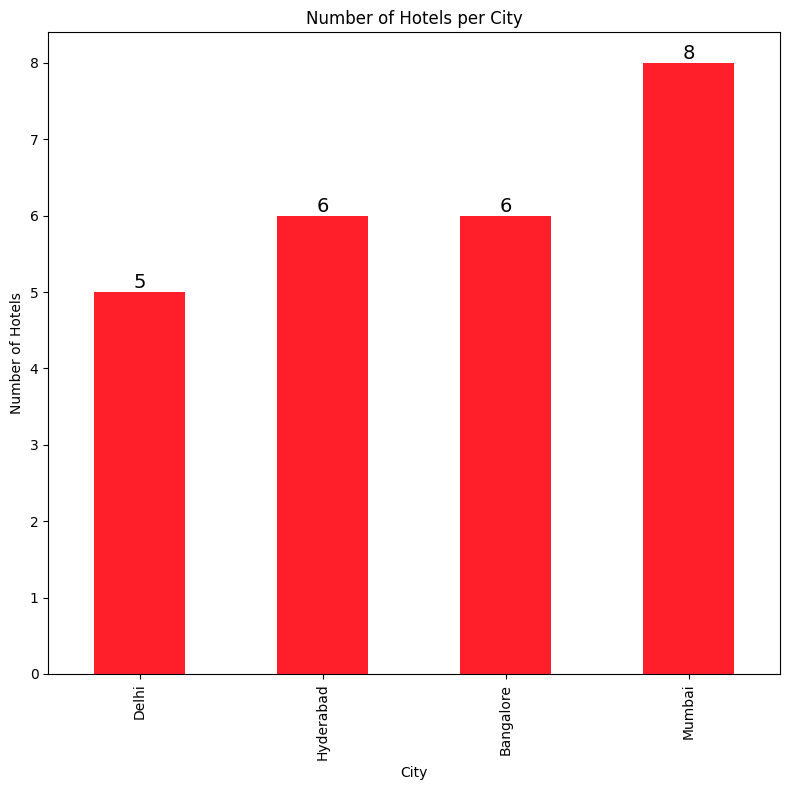

In [16]:
# Plot Bar Chart for Number of Hotels per City

graph = df_hotels.city.value_counts().sort_values()

# Calculate the number of bars
num_bars = len(graph)

# Dynamic figure size
fig_width = max(8, num_bars * 0.5)  # Ensures a minimum width of 8
fig_height = 8  # Fixed height or adjust based on preferences

# Set figure size
plt.figure(figsize=(fig_width, fig_height))

graph.plot(kind = 'bar', facecolor = '#ff1f2b')

plt.xlabel('City')
plt.ylabel('Number of Hotels')
plt.title('Number of Hotels per City')

# Adding labels on top of the bars
for index, value in enumerate(graph):
    plt.text(index, value, str(round(value, 2)), ha = 'center', va = 'bottom', fontsize=14)

# Adjust layout to make sure everything fits
plt.tight_layout()

# Save the figure with a transparent background
plt.savefig('no of hotels per city.png', transparent = True, bbox_inches='tight')

plt.show()

‏‏‎ ‎

In [17]:
# Checking the size of the table (rows & columns)

df_fact_agg_bookings.shape

(9200, 5)

In [18]:
# Printing first 5 rows from the fact_aggregated_bookings.csv file

df_fact_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [19]:
# Find out unique property ids in aggregate bookings dataset

df_fact_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [20]:
# Find out total bookings per property_id

df_fact_agg_bookings.groupby('property_id')['successful_bookings'].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [21]:
# Find out days on which bookings are greater than capacity

df_fact_agg_bookings[df_fact_agg_bookings.successful_bookings > df_fact_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [22]:
# Find out properties that have highest capacity

df_fact_agg_bookings.capacity.max()

np.float64(50.0)

In [23]:
# Properties with highest capacity

df_fact_agg_bookings[df_fact_agg_bookings.capacity == df_fact_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


‏‏‎ ‎

<h3>DATA CLEANING</h3>


In [24]:
# Printing first 5 rows from the fact_bookings.csv file

df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


<b>(1) Clean invalid guests

In [25]:
# Entries where number of guests are 0 or less

df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [26]:
# Checking the size of the table (rows & columns)

df_bookings.shape

(134590, 12)

As you can see above, number of guests having less than zero value represents data error. We can ignore these records.

In [27]:
# Removing these data

df_bookings = df_bookings[df_bookings.no_guests>0]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [28]:
# Checking the size of the new table (rows & columns)

df_bookings.shape

(134578, 12)

 ‎

<b>(2) Outlier removal in revenue generated

In [29]:
# Checking the Minimum & Maximum Revenue Generated

df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [30]:
# Calculating the average and standard deviation for the 'revenue_generated' column

avg,std = df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.std()
avg, std

(np.float64(15378.036937686695), np.float64(93040.1549314641))

In [31]:
# Calculating the higher limit

higher_limit = avg + (3 * std)
higher_limit

np.float64(294498.50173207896)

In [32]:
# Removing the outliers in the 'revenue_generated' column

df_bookings = df_bookings[df_bookings.revenue_generated < higher_limit]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [33]:
# Get a summary of the numeric column 'revenue_realized'

df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [34]:
# Calculating the average and standard deviation for the 'revenue_generated' column

avg,std = df_bookings.revenue_realized.mean(),df_bookings.revenue_realized.std()
avg, std

(np.float64(12695.983585117372), np.float64(6927.791692242814))

In [35]:
# Calculating the higher limit

higher_limit = avg + (3 * std)
higher_limit

np.float64(33479.358661845814)

In [36]:
df_bookings[df_bookings.revenue_realized > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


 ‎

In [37]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types

In [38]:
# Get a summary of the numeric column 'revenue_realized' where 'room_category' == 'RT4'

df_bookings[df_bookings.room_category=='RT4'].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [39]:
23439.308444 + (3 * 9048.599076)

50585.105672000005

Here higher limit comes to be 50585  and in our dataframe above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column.

In [40]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Total values in our dataframe is 134576. Out of that 77899 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating etc

 ‎

<b>(3) In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)

In [41]:
# Printing first 5 rows from the fact_aggregated_bookings.csv file

df_fact_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [42]:
# Checking for NULL values

df_fact_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [43]:
# Get a summary of the numeric column 'capacity'

df_fact_agg_bookings.capacity.describe()

count    9198.000000
mean       25.280496
std        11.442080
min         3.000000
25%        18.000000
50%        25.000000
75%        34.000000
max        50.000000
Name: capacity, dtype: float64

In [44]:
# Finding the median

df_fact_agg_bookings.capacity.median()

np.float64(25.0)

In [45]:
# Printing the entries containing NULL values

df_fact_agg_bookings[df_fact_agg_bookings.capacity.isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [46]:
# Replacing NULL values with median

df_fact_agg_bookings.capacity.fillna(df_fact_agg_bookings.capacity.median(), inplace=True)

C:\Users\aditi\AppData\Local\Temp\ipykernel_16824\399068473.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fact_agg_bookings.capacity.fillna(df_fact_agg_bookings.capacity.median(), inplace=True)


In [47]:
# Checking the entries with replaced values

df_fact_agg_bookings.loc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
14,17562,1-May-22,RT1,12,25.0


 ‎

<b>(4) In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records.

In [48]:
# Checking for entries that have successful bookings more than capacity

df_fact_agg_bookings[df_fact_agg_bookings.successful_bookings > df_fact_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [49]:
# Checking the size of the table (rows & columns)

df_fact_agg_bookings.shape

(9200, 5)

In [50]:
# Removing entries where successful bookings were more than capacity

df_fact_agg_bookings = df_fact_agg_bookings[df_fact_agg_bookings.successful_bookings <= df_fact_agg_bookings.capacity]
df_fact_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [51]:
# Checking the size of the table (rows & columns)

df_fact_agg_bookings.shape

(9194, 5)

 ‎

<h3>DATA TRANSFORMATION</h3>

<b>Create occupancy percentage column

In [52]:
# Printing first 5 rows from the fact_aggregated_bookings.csv file

df_fact_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0


In [53]:
# Creating the 'occ_pct' column

df_fact_agg_bookings['occ_pct'] = (df_fact_agg_bookings['successful_bookings'] / df_fact_agg_bookings['capacity'])
df_fact_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
4,16558,1-May-22,RT1,18,19.0,0.947368
5,17560,1-May-22,RT1,28,40.0,0.700000
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,0.722222
9196,16559,31-Jul-22,RT4,13,18.0,0.722222
9197,17558,31-Jul-22,RT4,3,6.0,0.500000
9198,19563,31-Jul-22,RT4,3,6.0,0.500000


Convert it to a percentage value

In [54]:
df_fact_agg_bookings['occ_pct'] = df_fact_agg_bookings['occ_pct'].apply(lambda x: round(x*100, 2))

In [55]:
# Printing first 5 rows from the fact_aggregated_bookings.csv file

df_fact_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


 ‎

<h3>INSIGHTS GENERATION</h3>

<b>1. What is an average occupancy rate in each of the room categories?

In [56]:
df_fact_agg_bookings.groupby('room_category')['occ_pct'].mean().round(2)

room_category
RT1    57.89
RT2    58.01
RT3    58.03
RT4    59.28
Name: occ_pct, dtype: float64

In [57]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


Print room categories such as Standard, Premium, Elite etc along with average occupancy percentage

In [58]:
df = pd.merge(df_fact_agg_bookings, df_rooms, left_on = 'room_category', right_on = 'room_id')
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,RT1,Standard
...,...,...,...,...,...,...,...,...
9189,16563,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9190,16559,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9191,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9192,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential


In [59]:
df.drop('room_id',axis=1,inplace=True)
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,Standard


In [60]:
df.groupby('room_class')['occ_pct'].mean().round(2)

room_class
Elite           58.01
Premium         58.03
Presidential    59.28
Standard        57.89
Name: occ_pct, dtype: float64

 ‎

<b>2. What is the average occupancy rate per city

In [61]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [62]:
df = pd.merge(df, df_hotels, on = 'property_id')
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore
3,16558,1-May-22,RT1,18,19.0,94.74,Standard,Atliq Grands,Luxury,Delhi
4,17560,1-May-22,RT1,28,40.0,70.00,Standard,Atliq City,Business,Mumbai
...,...,...,...,...,...,...,...,...,...,...
9189,16563,31-Jul-22,RT4,13,18.0,72.22,Presidential,Atliq Palace,Business,Delhi
9190,16559,31-Jul-22,RT4,13,18.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai
9191,17558,31-Jul-22,RT4,3,6.0,50.00,Presidential,Atliq Grands,Luxury,Mumbai
9192,19563,31-Jul-22,RT4,3,6.0,50.00,Presidential,Atliq Palace,Business,Bangalore


In [63]:
df.groupby('city')['occ_pct'].mean().round(2).sort_values()

city
Bangalore    56.33
Mumbai       57.91
Hyderabad    58.12
Delhi        61.51
Name: occ_pct, dtype: float64

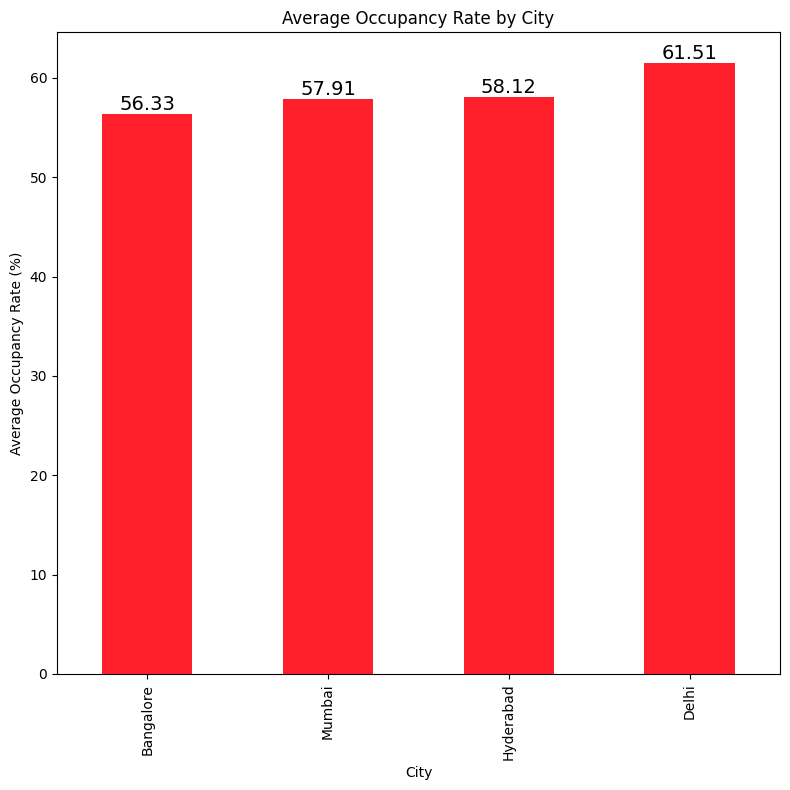

In [64]:
graph = df.groupby('city')['occ_pct'].mean().sort_values()

# Calculate the number of bars
num_bars = len(graph)

# Dynamic figure size
fig_width = max(8, num_bars * 0.5)  # Ensures a minimum width of 8
fig_height = 8  # Fixed height or adjust based on preferences

# Set figure size
plt.figure(figsize=(fig_width, fig_height))

graph.plot(kind = 'bar', facecolor = '#ff1f2b')

plt.xlabel('City')
plt.ylabel('Average Occupancy Rate (%)')
plt.title('Average Occupancy Rate by City')

# Adding labels on top of the bars
for index, value in enumerate(graph):
    plt.text(index, value, str(round(value, 2)), ha = 'center', va = 'bottom', fontsize = 14)

# Adjust layout to make sure everything fits
plt.tight_layout()

# Save the figure with a transparent background
plt.savefig('average occupancy rate per city.png', transparent = True, bbox_inches='tight')

plt.show()

<b> Insight:

Delhi has the highest average occupancy rate among cities (60.40%), while Bangalore has the lowest (55.29%).

 ‎

<b>3. When was the occupancy better? Weekday or Weekend?

In [65]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [66]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore
3,16558,1-May-22,RT1,18,19.0,94.74,Standard,Atliq Grands,Luxury,Delhi
4,17560,1-May-22,RT1,28,40.0,70.00,Standard,Atliq City,Business,Mumbai


In [67]:
df = pd.merge(df, df_date, right_on = 'date', left_on = 'check_in_date')
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,Standard,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,57.89,Standard,Atliq Grands,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday


In [68]:
df.groupby('day_type')['occ_pct'].mean().round(2)

day_type
weekeday    50.88
weekend     72.34
Name: occ_pct, dtype: float64

<b>Insight:

Weekends show significantly higher occupancy rates compared to weekdays, indicating a potential opportunity for targeted marketing or pricing adjustments.

 ‎

<b>4: In the month of June, what is the occupancy for different cities

In [69]:
df['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [70]:
df_june = df[df['mmm yy'] == 'Jun 22']
df_june.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,63.33,Standard,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,RT1,17,30.0,56.67,Standard,Atliq Palace,Business,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2203,17558,10-Jun-22,RT1,9,19.0,47.37,Standard,Atliq Grands,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2204,16558,10-Jun-22,RT1,11,19.0,57.89,Standard,Atliq Grands,Luxury,Delhi,10-Jun-22,Jun 22,W 24,weekeday


In [71]:
df_june.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending = False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.44
Name: occ_pct, dtype: float64

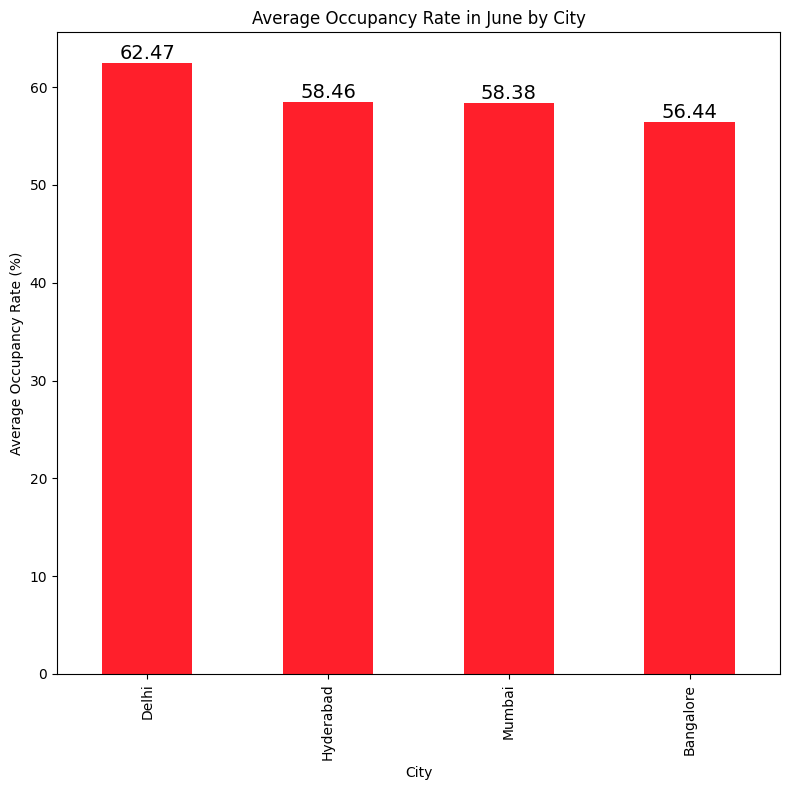

In [72]:
graph = df_june.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending = False)

# Calculate the number of bars
num_bars = len(graph)

# Dynamic figure size
fig_width = max(8, num_bars * 0.5)  # Ensures a minimum width of 8
fig_height = 8  # Fixed height or adjust based on preferences

# Set figure size
plt.figure(figsize=(fig_width, fig_height))

graph.plot(kind = 'bar', facecolor = '#ff1f2b')

plt.xlabel('City')
plt.ylabel('Average Occupancy Rate (%)')
plt.title('Average Occupancy Rate in June by City')

# Adding labels on top of the bars
for index, value in enumerate(graph):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', fontsize = 14)

# Adjust layout to make sure everything fits
plt.tight_layout()

# Save the figure with a transparent background
plt.savefig('average occupancy rate in june by city.png', transparent = True, bbox_inches = 'tight')

plt.show()

<b> Insight:

In the month of June, Delhi had the highest occupancy rate (62.47%), followed closely by Hyderabad (58.46%).

 ‎

<b>5: We got new data for the month of august. Append that to existing data

In [73]:
df_august=pd.read_csv('datasets/new_data_august.csv')
df_august.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [74]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [75]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [76]:
df_august.shape

(7, 13)

In [77]:
df.shape

(6497, 14)

In [78]:
latest_df=pd.concat([df, df_august], ignore_index = True, axis = 0)
latest_df.tail()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6499,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6500,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6501,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6502,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6503,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [79]:
latest_df.shape

(6504, 15)

 ‎

<b>6. What is the revenue realized per city

In [80]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [81]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [82]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on = 'property_id')
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [83]:
df_bookings_all.groupby('city')['revenue_realized'].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

<b> Insight:

Mumbai generates the highest revenue among the cities, totaling 668,569,251 units.

 ‎

<b>7. Print month by month revenue

In [84]:
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [85]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [86]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [87]:
df_date['date'] = pd.to_datetime(df_date['date'])
df_date.head()

C:\Users\aditi\AppData\Local\Temp\ipykernel_16824\269778243.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date['date'] = pd.to_datetime(df_date['date'])


,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [88]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [89]:
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [90]:
df_bookings_all['check_in_date'] = pd.to_datetime(df_bookings_all['check_in_date'],format = 'mixed')
df_bookings_all

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,2022-01-05,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,2022-01-05,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134568,Jul312217564RT45,17564,30-07-22,2022-07-31,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134569,Jul312217564RT46,17564,29-07-22,2022-07-31,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134570,Jul312217564RT48,17564,30-07-22,2022-07-31,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai
134571,Jul312217564RT49,17564,29-07-22,2022-07-31,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai


In [91]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      134573 non-null  datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
 12  property_name      134573 non-null  object        
 13  category           134573 non-null  object  

In [92]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on = 'check_in_date', right_on = 'date')
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
3,May052216558RT14,16558,3/5/2022,2022-05-05,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
4,May052216558RT15,16558,30-04-22,2022-05-05,10/5/2022,4.0,RT1,others,4.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [93]:
df_bookings_all.groupby('mmm yy')['revenue_realized'].sum()

mmm yy
Jul 22    389940912
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64

<b>Insight:

The hotel's revenue fluctuates month by month, with July 2022 generating 389,940,912 units and May 2022 generating 408,375,641 units.

 ‎

In [94]:
# Print revenue realized per hotel type
df_bookings_all.groupby('category')['revenue_realized'].sum()

category
Business    451950715
Luxury      723557067
Name: revenue_realized, dtype: int64

 ‎

In [95]:
# Print revenue realized per hotel

df_bookings_all.groupby('property_name')['revenue_realized'].sum().round(2).sort_values()

property_name
Atliq Seasons     45920757
Atliq Grands     145860641
Atliq Blu        179203544
Atliq Bay        179416721
Atliq City       196555383
Atliq Palace     209474575
Atliq Exotica    219076161
Name: revenue_realized, dtype: int64

 ‎

In [96]:
#Print average rating per city
df_bookings_all.groupby('city')['ratings_given'].mean().round(2)

city
Bangalore    3.40
Delhi        3.78
Hyderabad    3.66
Mumbai       3.64
Name: ratings_given, dtype: float64

 ‎

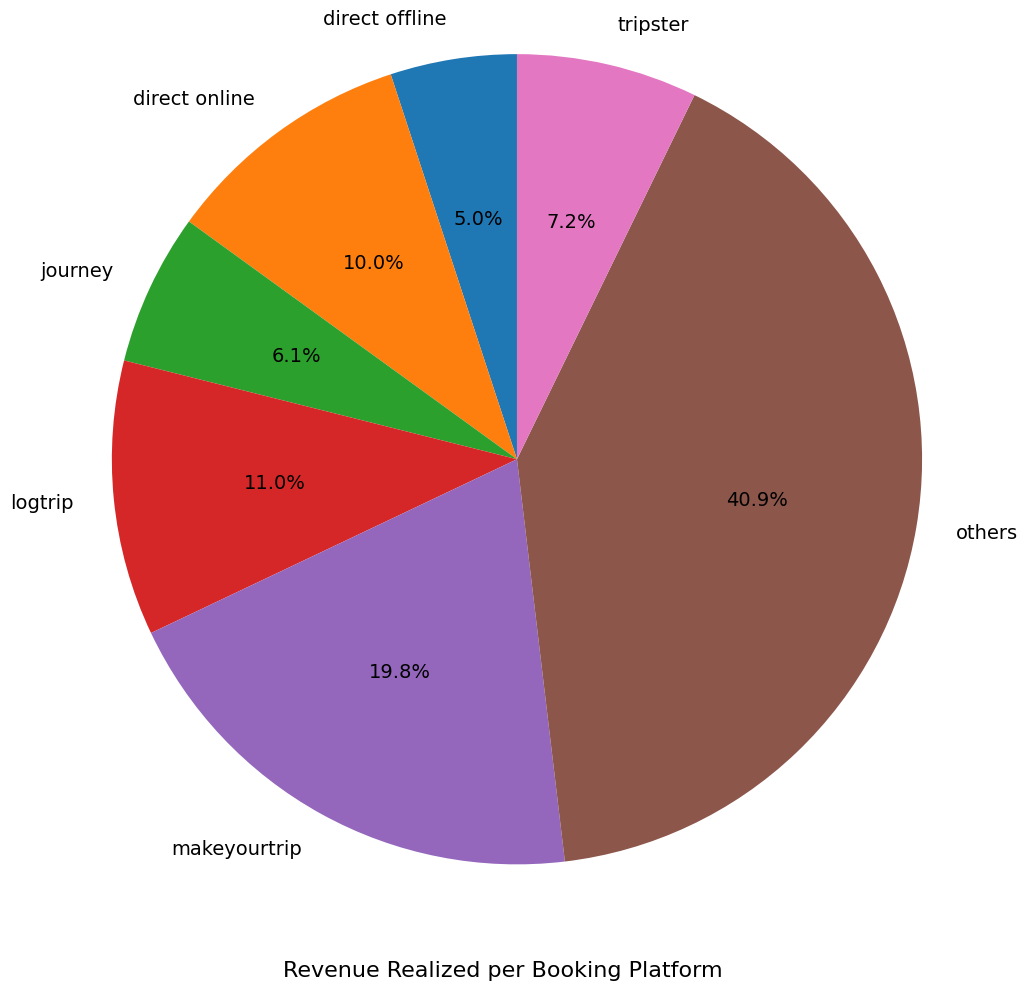

In [97]:
# Print a pie chart of revenue realized per booking platform

graph = df_bookings_all.groupby('booking_platform')['revenue_realized'].sum()

# Calculate dynamic figure size based on the number of categories
num_categories = len(graph)
fig_width = 8 + (num_categories * 0.5)  # Increase width based on number of categories
fig_height = 8 + (num_categories * 0.5)  # Increase height based on number of categories

# Set figure size
plt.figure(figsize=(fig_width, fig_height))

ax = graph.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 90, textprops = {'fontsize': 14})

# Hide the y-axis label
ax.set_ylabel('')

# Move title to the bottom
plt.figtext(0.5, 0.05, 'Revenue Realized per Booking Platform', ha = 'center', va = 'center', fontsize = 16)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save the figure with a transparent background
plt.savefig('revenue realized per booking platform.png', transparent = True, bbox_inches = 'tight')

plt.show()

<b>Insight:

The revenue realized per booking platform varies, with 'others' being the highest contributor (480,698,244 units), followed by 'makeyourtrip' (233,132,708 units).